In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




/kaggle/input/emotion-classification-nlp/emotion-labels-train.csv
/kaggle/input/emotion-classification-nlp/emotion-labels-val.csv
/kaggle/input/emotion-classification-nlp/emotion-labels-test.csv


In [2]:
import pandas as pd
dataset ={}
for k in ['train','val','test']:
    dataset[k] = pd.read_csv(f'/kaggle/input/emotion-classification-nlp/emotion-labels-{k}.csv')

In [3]:
#!pip install demoji
#!pip install emoji

In [4]:
print('tarin set:\n',dataset['train']['label'].value_counts(), ',total:', len(dataset['train']['label'])) # summary of train data
print('val set:\n',dataset['val']['label'].value_counts(), ',total:', len(dataset['val']['label'])) # summary of train data
print('test set:\n',dataset['test']['label'].value_counts(), ',total:', len(dataset['test']['label'])) # summary of train data


tarin set:
 fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64 ,total: 3613
val set:
 fear       110
anger       84
joy         79
sadness     74
Name: label, dtype: int64 ,total: 347
test set:
 fear       995
anger      760
joy        714
sadness    673
Name: label, dtype: int64 ,total: 3142


In [5]:
# #pre processing
#import demoji
#import emoji
import re
#emoji - step 1


def preprocessing(text):
   # text = emoji.demojize(text) 

#Lowercasing all the letters-step 2
    text = text.lower()

#Removing hashtags and mentions
    text = re.sub("@[A-Za-z0-9_]+","", text)
#text_filter = [re.sub("#[A-Za-z0-9_]+","", text) for text in text_filter]

# print(text_filter[:10])

#Removing links
    text = re.sub(r"http\S+", "", text) 
    text = re.sub(r"www.\S+", "", text)
 
#Removing punctuations
    text = re.sub('[()!?]', " ", text) 
    text = re.sub('\[.*?\]', " ", text)
#Removing numbers
    text = re.sub("[0-9]","", text)
#add filter text to the df
    return text



In [6]:
for k,v in dataset.items():
    v['text_processed'] = v['text'].apply(preprocessing)

In [7]:
#emoji.demojize

In [8]:
dataset['train']

,text,label,text_processed
0,Just got back from seeing @GaryDelaney in Burs...,joy,just got back from seeing in burslem. amazing...
1,Oh dear an evening of absolute hilarity I don'...,joy,oh dear an evening of absolute hilarity i don'...
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,been waiting all week for this game ❤️❤️❤️ #ch...
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,": thank you so much, gloria you're so sweet,..."
4,I feel so blessed to work with the family that...,joy,i feel so blessed to work with the family that...
...,...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,sadness,thank you so much just home - stunned but so...
3609,Just put the winter duvet on ☃️❄️🌬☔️,sadness,just put the winter duvet on ☃️❄️🌬☔️
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,that's so pretty i love the sky in the back...
3611,@BluesfestByron second artist announcement loo...,sadness,second artist announcement looking good #blue...


In [9]:
X_train = dataset['train']['text_processed']
y_train = dataset['train']['label']

X_val = dataset['val']['text_processed']
y_val = dataset['val']['label']

X_test = dataset['test']['text_processed']
y_test = dataset['test']['label']

In [10]:
#Lemmatizer function
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [11]:
# features processing
#countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer(stop_words = 'english',min_df=5,max_df=0.95)

#Transform the training data
count_train = countvec.fit_transform(X_train)

#Transform the val data
count_val = countvec.transform(X_val)


count_df = pd.DataFrame(count_train.A , columns=countvec.get_feature_names())
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(stop_words="english",min_df=5,max_df=0.95, ngram_range=(1,3))

# Transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the val data: 
tfidf_val = tfidf_vectorizer.transform(X_val)

tfidf_df = pd.DataFrame(tfidf_train.A , columns=tfidf_vectorizer.get_feature_names())


In [12]:
count_df

,able,absolute,absolutely,accept,access,account,act,action,actually,add,...,year,years,yep,yes,yesterday,yo,young,youtube,yrs,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
tfidf_df

,able,absolute,absolutely,accept,accept challenges,accept challenges feel,access,account,act,action,...,year,years,yep,yes,yesterday,yo,young,youtube,yrs,zero
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.35243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3609,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3610,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3611,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#classification MultinomialNB - BOW FEATURES
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_val)

score = metrics.accuracy_score(y_val,pred)
print(score)

#classification MultinomialNB - tf-idf FEATURES
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_val)

score = metrics.accuracy_score(y_val,pred)
print(score)

0.792507204610951
0.8069164265129684


In [15]:
((count_train > 0).sum(axis=0) < 5).mean()

0.0

In [16]:
count_df

,able,absolute,absolutely,accept,access,account,act,action,actually,add,...,year,years,yep,yes,yesterday,yo,young,youtube,yrs,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


              precision    recall  f1-score   support

       anger       0.86      0.75      0.80        84
        fear       0.73      0.90      0.81       110
         joy       0.89      0.80      0.84        79
     sadness       0.81      0.74      0.77        74

    accuracy                           0.81       347
   macro avg       0.82      0.80      0.81       347
weighted avg       0.82      0.81      0.81       347



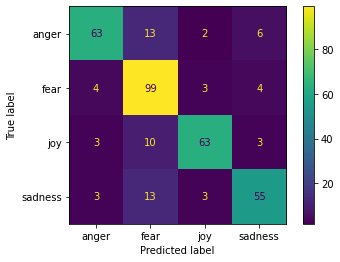

In [17]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred = nb_classifier.predict(tfidf_val)
print(classification_report(y_val, pred))
cm = confusion_matrix(y_val, pred, labels=nb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=nb_classifier.classes_)
disp.plot()

SVM Accuracy Score ->  0.8097982708933718
              precision    recall  f1-score   support

       anger       0.85      0.79      0.81        84
        fear       0.73      0.87      0.80       110
         joy       0.89      0.84      0.86        79
     sadness       0.83      0.72      0.77        74

    accuracy                           0.81       347
   macro avg       0.82      0.80      0.81       347
weighted avg       0.82      0.81      0.81       347



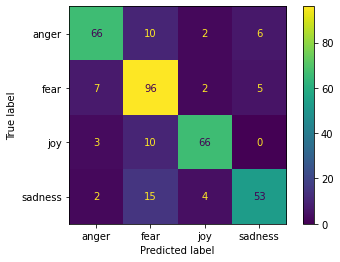

In [18]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
from sklearn import svm

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfidf_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfidf_val)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",metrics.accuracy_score(predictions_SVM, y_val))

print(classification_report(y_val, predictions_SVM))
cm = confusion_matrix(y_val, predictions_SVM, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=SVM.classes_)
disp.plot()